# [Symbolic Format: CSV](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_CSV.html)

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
import pandas as pd
import IPython.display as ipd


In [2]:
fn = 'FMP/data/C1/FMP_C1_F01_Beethoven_FateMotive_Sibelius.csv'

with open(fn, 'r', encoding='utf-8') as file:
    csv_str = file.read()


In [3]:
df = pd.read_csv(fn, sep=';')
print(df.loc[0:5, :])

   Start  Duration  Pitch  Velocity       Label
0   0.25      0.23   67.0       1.0  Right Hand
1   0.25      0.23   55.0       1.0  Right Hand
2   0.25      0.23   43.0       1.0   Left Hand
3   0.50      0.23   67.0       1.0  Right Hand
4   0.50      0.23   55.0       1.0  Right Hand
5   0.50      0.23   43.0       1.0   Left Hand


In [4]:
html = df.loc[0:5,:].to_html(index=False)
ipd.HTML(html)

Start,Duration,Pitch,Velocity,Label
0.25,0.23,67.0,1.0,Right Hand
0.25,0.23,55.0,1.0,Right Hand
0.25,0.23,43.0,1.0,Left Hand
0.50,0.23,67.0,1.0,Right Hand
0.50,0.23,55.0,1.0,Right Hand
0.50,0.23,43.0,1.0,Left Hand


In [5]:
import sys
sys.path.append('./FMP')
import libfmp.b


def df_to_list(df):
    score = []
    for i, (start, duration, pitch, velocity, label) in df.iterrows():
        score.append([start, duration, pitch, velocity, label])
    return score

def visualize_piano_roll(score, xlabel='Time (seconds)', ylabel='Pitch', colors='FMP_1', velocity_alpha=False,
                         figsize=(12, 4), ax=None, dpi=72):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = plt.subplot(1, 1, 1)

    labels_set = sorted(set([note[4] for note in score]))
    colors = libfmp.b.color_argument_to_dict(colors, labels_set)

    pitch_min = min(note[2] for note in score)
    pitch_max = max(note[2] for note in score)
    time_min = min(note[0] for note in score)
    time_max = max(note[0] + note[1] for note in score)

    for start, duration, pitch, velocity, label in score:
        if velocity_alpha is False:
            velocity = None
        rect = patches.Rectangle((start, pitch - 0.5), duration, 1, linewidth=1,
                                    edgecolor='k', facecolor=colors[label], alpha=velocity)
        ax.add_patch(rect)

    ax.set_ylim([pitch_min - 1.5, pitch_max + 1.5])
    ax.set_xlim([min(time_min, 0), time_max + 0.5])
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
    ax.set_axisbelow(True)
    ax.legend([patches.Patch(linewidth=1, edgecolor='k', facecolor=colors[key]) for key in labels_set],
                labels_set, loc='upper right', framealpha=1)

    plt.tight_layout()
    return fig, ax


(<Figure size 864x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9671eb3e50>)

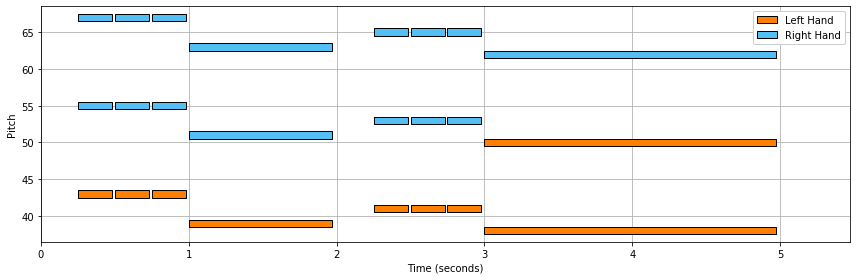

In [6]:
fn = 'FMP/data/C1/FMP_C1_F01_Beethoven_FateMotive_Sibelius.csv'
df = pd.read_csv(fn, sep=';')
score = df_to_list(df)
visualize_piano_roll(score)

(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9674d2f3d0>)

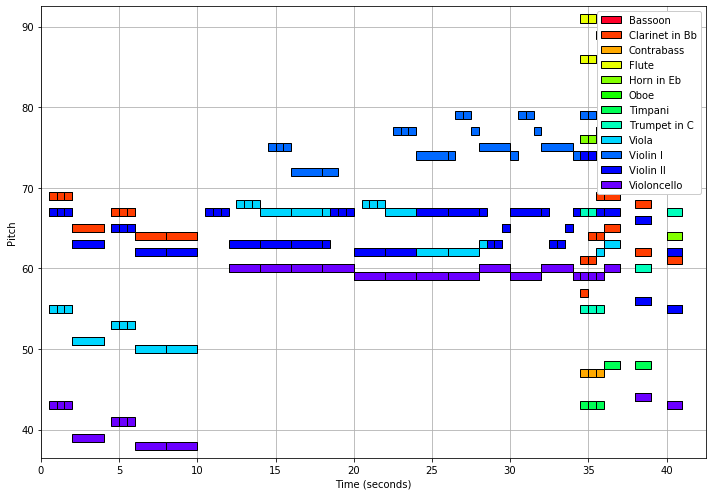

In [7]:
fn = 'FMP/data/C1/FMP_C1_F10_Beethoven_Fifth-MM1-21_Sibelius-Orchestra.csv'

df = pd.read_csv(fn, sep=';')
score_list = df_to_list(df)
visualize_piano_roll(score_list, figsize=(10, 7), colors='gist_rainbow')


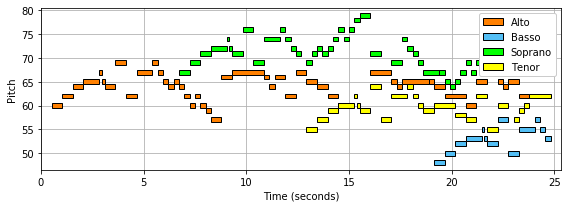

In [8]:
fn = 'FMP/data/C1/FMP_C1_F12_Bach_BWV846_Sibelius-Tracks.csv'

df = pd.read_csv(fn, sep=';')
score_list = df_to_list(df)
visualize_piano_roll(score_list, figsize=(8, 3))

plt.savefig('PianoRoll.png')

(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9676f0ce50>)

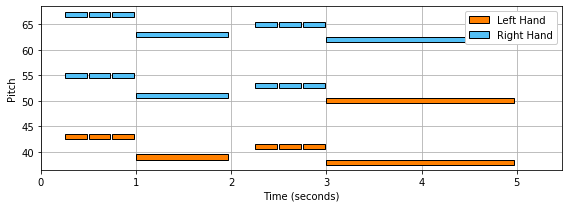

In [9]:
import sys
sys.path.append('./FMP')
import libfmp.c1

fn = 'FMP/data/C1/FMP_C1_F01_Beethoven_FateMotive_Sibelius.csv'
score=libfmp.c1.csv_to_list(fn)
libfmp.c1.visualize_piano_roll(score, figsize = (8, 3))

patches の参考
[Matplotlibで円や長方形などの図形を描画](https://note.nkmk.me/python-matplotlib-patches-circle-rectangle/)